In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [7]:
data=pd.read_csv("C:/Users/JYOSHNA/Downloads/NSE-TATAGLOBAL.csv")

In [8]:
data.shape

(2035, 8)

In [9]:
data.sort_values(by='Date',inplace=True)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [10]:
hig=data.Close
hig.head()

2034    121.55
2033    120.90
2032    120.65
2031    117.60
2030    118.65
Name: Close, dtype: float64

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
hig=scaler.fit_transform(np.array(hig).reshape(-1,1))
# hig

In [12]:
train_size=int(len(hig)*0.7)
test_size=len(hig) - train_size

train_data , test_data = hig[ 0 : train_size,: ] , hig[ train_size : len(hig),:1 ]

In [13]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [21]:
time_step=100
x_train , y_train =create_dataset(train_data,time_step)
x_test , y_test = create_dataset(test_data,time_step)

In [22]:
print(x_train.shape , y_train.shape)

(1323, 100) (1323,)


In [23]:
scaler=MinMaxScaler(feature_range=(0,1))
hig=scaler.fit_transform(np.array(hig).reshape(-1,1))
# hig

In [24]:
train_size=int(len(hig)*0.7)
test_size=len(hig) - train_size

train_data , test_data = hig[ 0 : train_size,: ] , hig[ train_size : len(hig),:1 ]

In [25]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [26]:
time_step=100
x_train , y_train =create_dataset(train_data,time_step)
x_test , y_test = create_dataset(test_data,time_step)
print(x_train.shape , y_train.shape)

(1323, 100) (1323,)


In [27]:
print(x_test.shape , y_test.shape)

(510, 100) (510,)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)
mdl=Sequential()
mdl.add(LSTM(50,return_sequences=True , input_shape=(100,1)))
mdl.add(LSTM(50,return_sequences=True))
mdl.add(LSTM(50))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error')
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
mdl.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100 , batch_size=64)

Epoch 1/100
21/21 [==============================] - 25s 508ms/step - loss: 0.0066 - val_loss: 0.0041
Epoch 2/100
21/21 [==============================] - 7s 327ms/step - loss: 0.0024 - val_loss: 0.0206
Epoch 3/100
21/21 [==============================] - 6s 291ms/step - loss: 0.0019 - val_loss: 0.0062
Epoch 4/100
21/21 [==============================] - 6s 293ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 5/100
21/21 [==============================] - 6s 283ms/step - loss: 0.0011 - val_loss: 0.0057
Epoch 6/100
21/21 [==============================] - 6s 297ms/step - loss: 0.0017 - val_loss: 0.0065
Epoch 7/100
21/21 [==============================] - 7s 312ms/step - loss: 0.0013 - val_loss: 0.0093
Epoch 8/100
21/21 [==============================] - 6s 281ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 9/100
21/21 [==============================] - 7s 319ms/step - loss: 0.0011 - val_loss: 0.0129
Epoch 10/100
21/21 [==============================] - 6s 276ms/step - loss: 0.0010 - val_l

In [31]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
train_predict=mdl.predict(x_train)
test_predict=mdl.predict(x_test)

16/16 [==============================] - 1s 66ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))


0.011112373086047022
0.10739607849084246


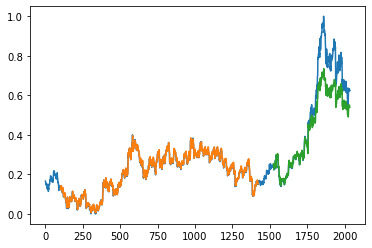

In [33]:
look_back=100
trainPredictPlot = np.empty_like(hig)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(hig)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(hig)-1, :] = test_predict
plt.plot(scaler.inverse_transform(hig))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

611

In [35]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
len(temp_input)

100

In [37]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = mdl.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = mdl.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.5394307]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(hig)

2035

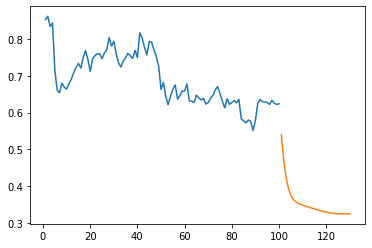

In [39]:
plt.plot(day_new,scaler.inverse_transform(hig[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
